<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/combined_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

 Angie.ipynb	       desktop.ini		 Isaac.ipynb	        Test_data.csv
'AT2 Prezzo.gslides'   Harris.ipynb		 mergeNotebooks.ipynb   Timothy.ipynb
 combined_code.ipynb  'IDS Prezzo Pretty.pptx'	 Samuel.ipynb	        Train_data.csv


## Import necessary libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC
# DT
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

## Intrusion Data

In [5]:
intrusion_data = pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [6]:
intrusion_data['class'].value_counts()

class
normal     13449
anomaly    11743
Name: count, dtype: int64

In [7]:
value_counts = intrusion_data['class'].value_counts()
total_values = len(intrusion_data['class'].dropna())
percentages = (value_counts / total_values) * 100
print(percentages)

class
normal     53.385996
anomaly    46.614004
Name: count, dtype: float64


# Preprocessing

In [8]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [9]:
for column in intrusion_data.columns:
    print(f"Counts for {column}:")
    print(intrusion_data[column].value_counts())
    print("------------")

Counts for duration:
duration
0        23168
1          374
2          165
3          102
4           75
         ...  
17025        1
12892        1
584          1
10774        1
322          1
Name: count, Length: 758, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     20526
udp      3011
icmp     1655
Name: count, dtype: int64
------------
Counts for service:
service
http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: count, Length: 66, dtype: int64
------------
Counts for flag:
flag
SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        9866
8         738
1         480
44        467
45        416
         ... 
37

#Attribute Analyses and Input selection

In [10]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
intrusion_data = pd.read_csv('Train_data.csv')

In [12]:
intrusion_data_right = intrusion_data
intrusion_data_right['class_label'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [13]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [14]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                   0.566151
dst_bytes                   0.438351
diff_srv_rate               0.357213
same_srv_rate               0.355806
dst_host_srv_count          0.327113
dst_host_same_srv_rate      0.309979
dst_host_diff_srv_rate      0.284705
dst_host_srv_serror_rate    0.281003
dst_host_serror_rate        0.278995
logged_in                   0.278946
dtype: float64


In [15]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [16]:
intrusion_data_right['class_label'].value_counts()

class_label
0    13449
1    11743
Name: count, dtype: int64

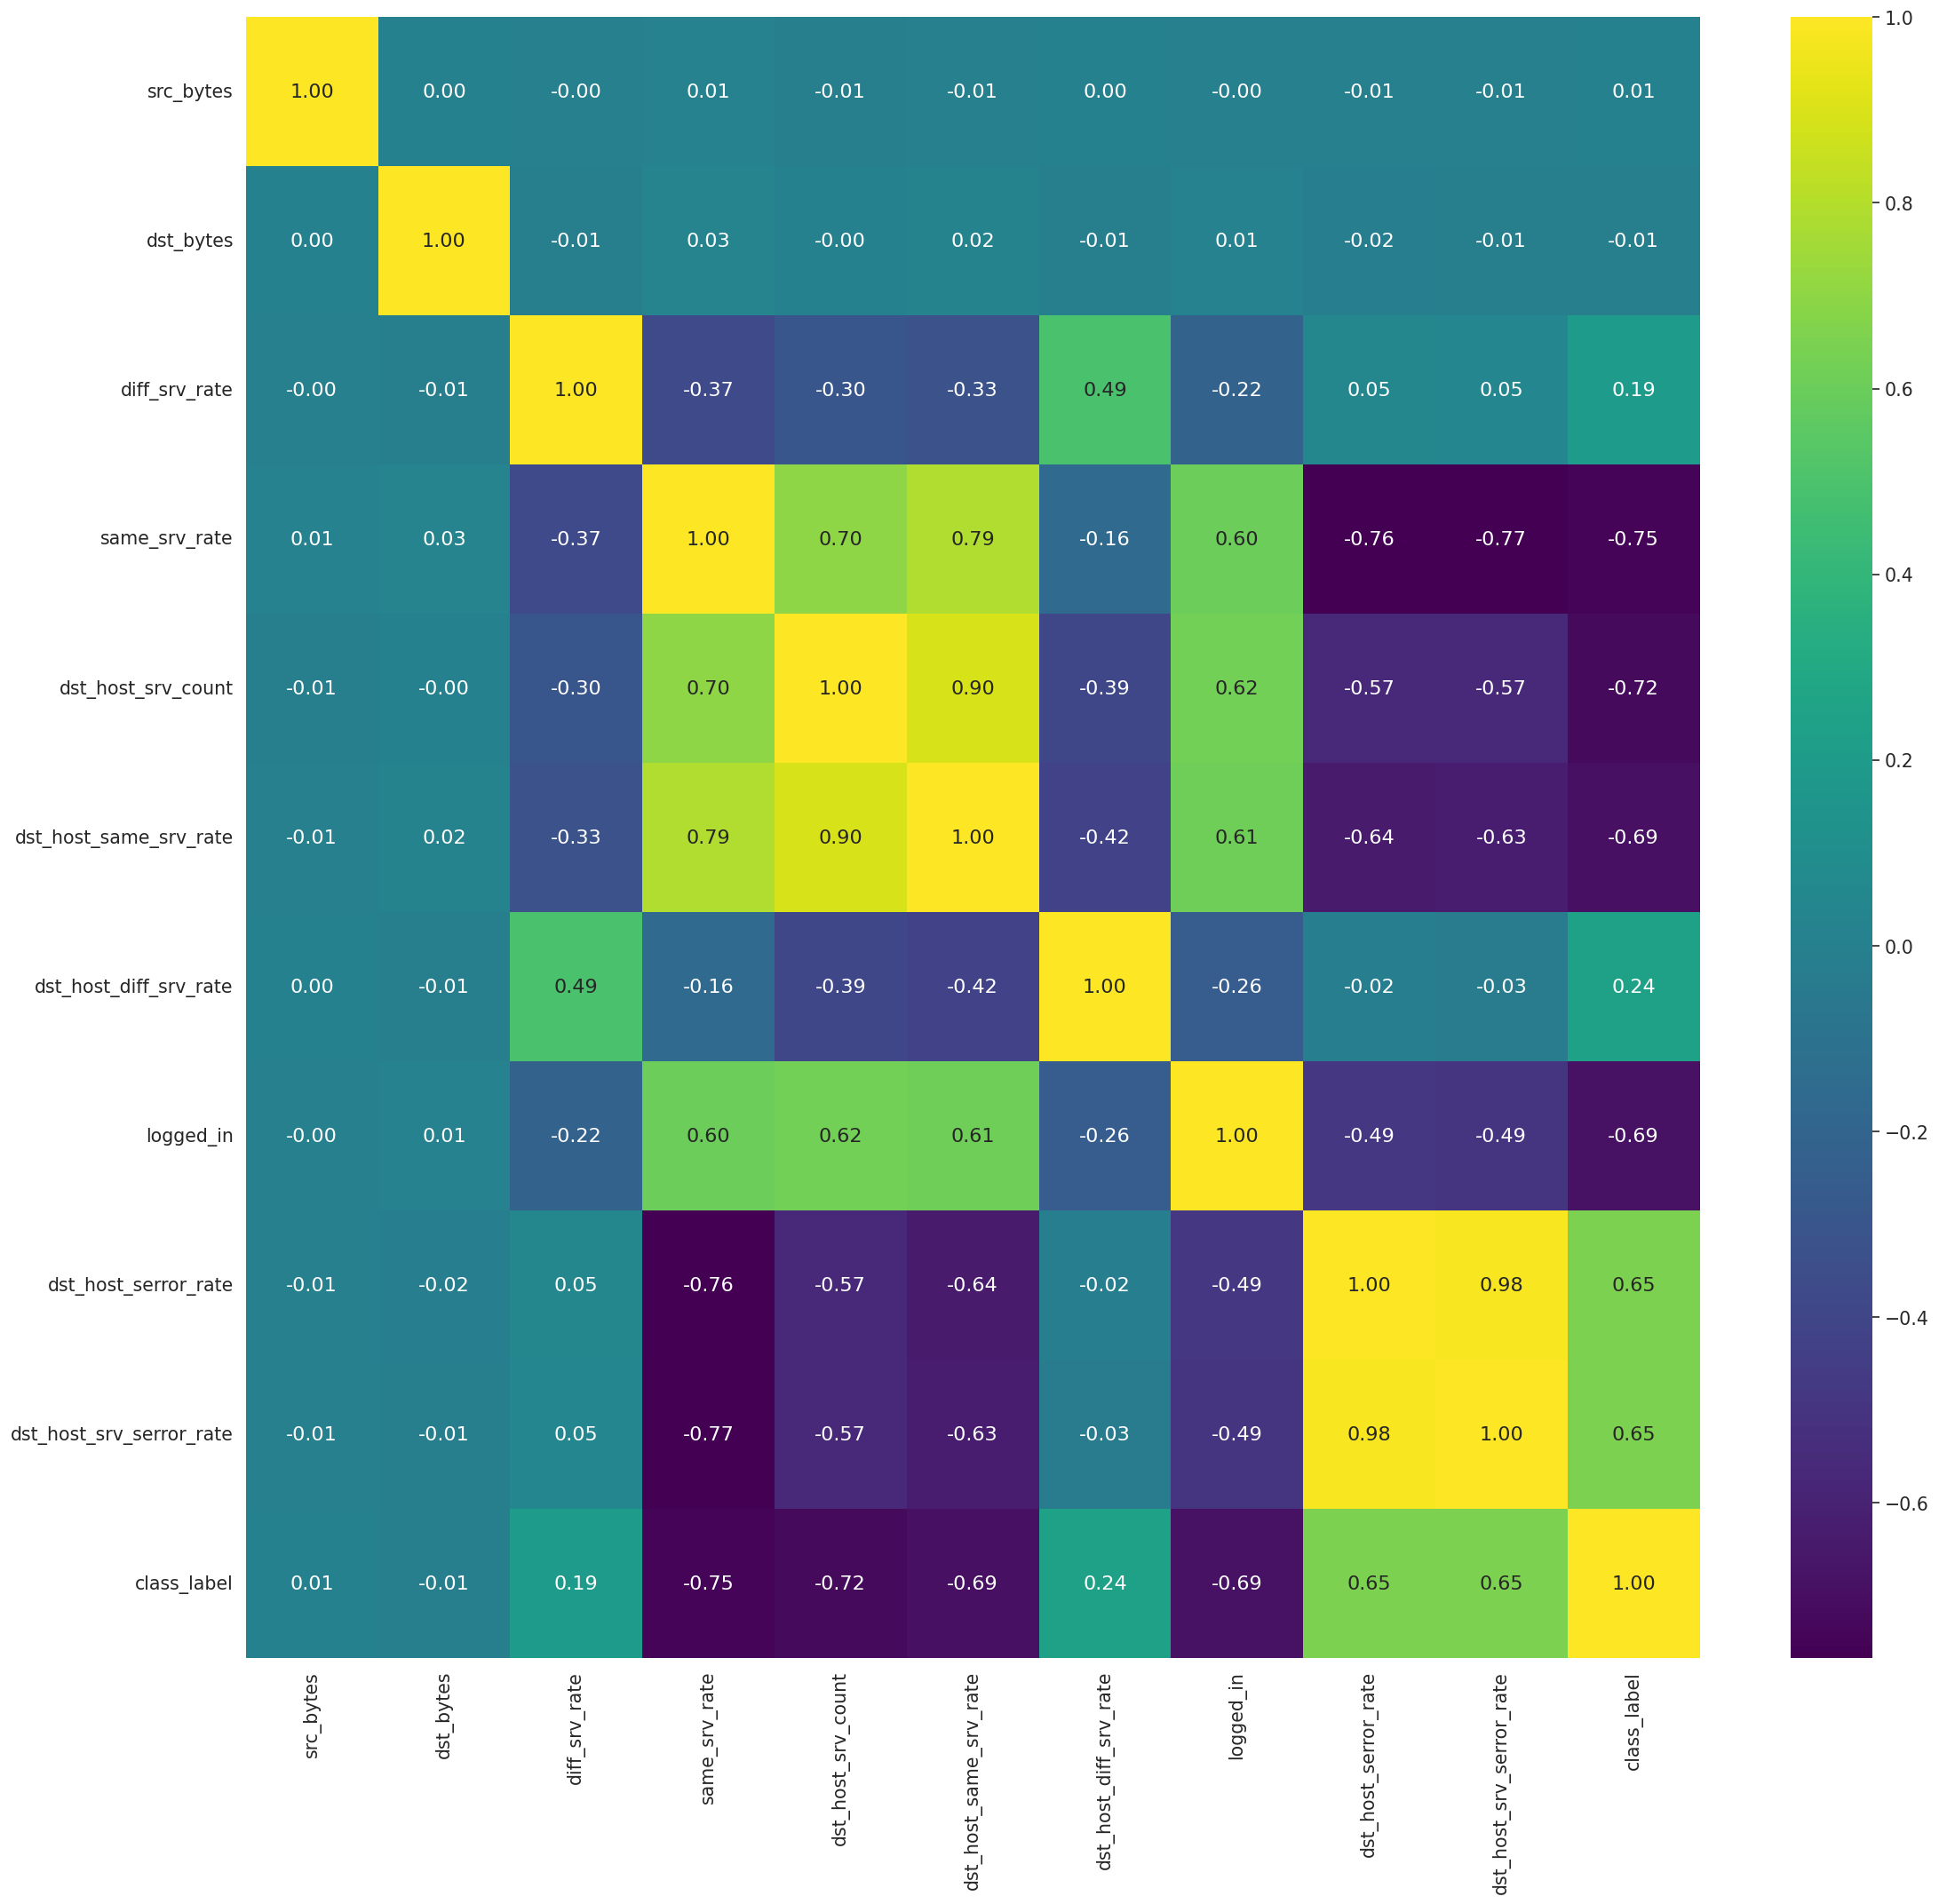

In [17]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

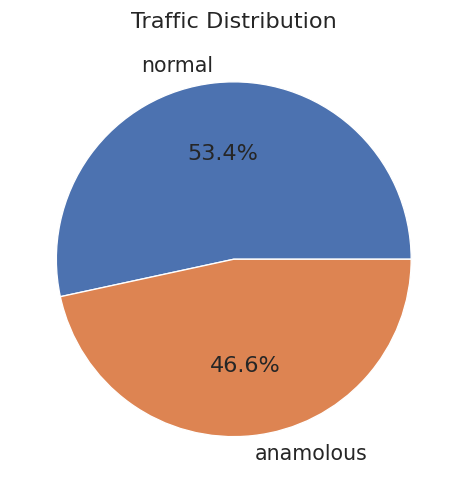

In [18]:
label_counts = intrusion_data['class'].value_counts()
plt.pie(label_counts, labels=['normal', 'anamolous'], autopct='%1.1f%%')
plt.title('Traffic Distribution')
plt.show()

# Splitting Data

In [19]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count', 'class_label']]

In [20]:
top_10_info_gain

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
0,491,0,0.00,1.00,25,0
1,146,0,0.15,0.08,1,0
2,0,0,0.07,0.05,26,1
3,232,8153,0.00,1.00,255,0
4,199,420,0.00,1.00,255,0
...,...,...,...,...,...,...
25187,0,0,0.07,0.07,7,1
25188,334,0,0.00,1.00,39,1
25189,0,0,0.07,0.07,13,1
25190,0,0,0.06,0.14,20,1


In [21]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = top_10_info_gain[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count']]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,src_bytes,dst_bytes,diff_srv_rate,same_srv_rate,dst_host_srv_count,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.410255e-19,-5.641019e-19,-4.195508e-18,-1.452562e-17,-6.035890e-17,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.502538e+00,-1.039933e+00,0.000000
25%,-1.009252e-02,-3.930979e-02,-3.492819e-01,-1.297820e+00,-9.495537e-01,0.000000
50%,-1.007427e-02,-3.930979e-02,-3.492819e-01,7.721087e-01,-4.886186e-01,0.000000
75%,-9.976793e-03,-3.334045e-02,-1.323494e-02,7.721087e-01,1.264742e+00,1.000000
max,1.583257e+02,5.795287e+01,5.251501e+00,7.721087e-01,1.264742e+00,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [23]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [24]:
y_train

4829     1
21359    1
11581    0
11114    1
14487    0
        ..
18979    0
11922    1
3042     0
21238    1
23420    1
Name: class_label, Length: 17634, dtype: int64

In [25]:
y_train.value_counts()

class_label
0    9421
1    8213
Name: count, dtype: int64

# xgBoost - benchmark and GA Accuracy measure

In [26]:
top_10_info = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [27]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = int_data_no_strings.drop(["class_label"], axis=1)
y_base = int_data_no_strings["class_label"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)

In [28]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [29]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
12190,0,0,0,0,0,0,0,0,0,0,...,255,16,0.06,0.08,0.00,0.00,0.00,0.00,1.00,1.00
22746,0,0,0,0,0,0,0,0,0,0,...,255,3,0.01,0.07,0.00,0.00,1.00,1.00,0.00,0.00
12673,0,54540,4380,0,0,0,1,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.04,0.04
10287,0,215,0,0,0,0,0,0,0,0,...,213,181,0.85,0.01,0.85,0.00,0.00,0.00,0.00,0.00
19266,0,1032,0,0,0,0,0,0,0,0,...,255,56,0.22,0.02,0.22,0.00,0.02,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,0,45,78,0,0,0,0,0,0,0,...,255,245,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
15369,0,199,354,0,0,0,0,0,1,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3582,0,0,0,0,0,0,0,0,0,0,...,255,6,0.02,0.09,0.00,0.00,1.00,1.00,0.00,0.00
3623,2,2194619,0,0,0,0,0,0,1,0,...,236,50,0.19,0.02,0.19,0.04,0.00,0.00,0.00,0.00


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [31]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [32]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9972321075523922


In [33]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9972046651617759


In [34]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9972451980660575


In [35]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9972247744570768


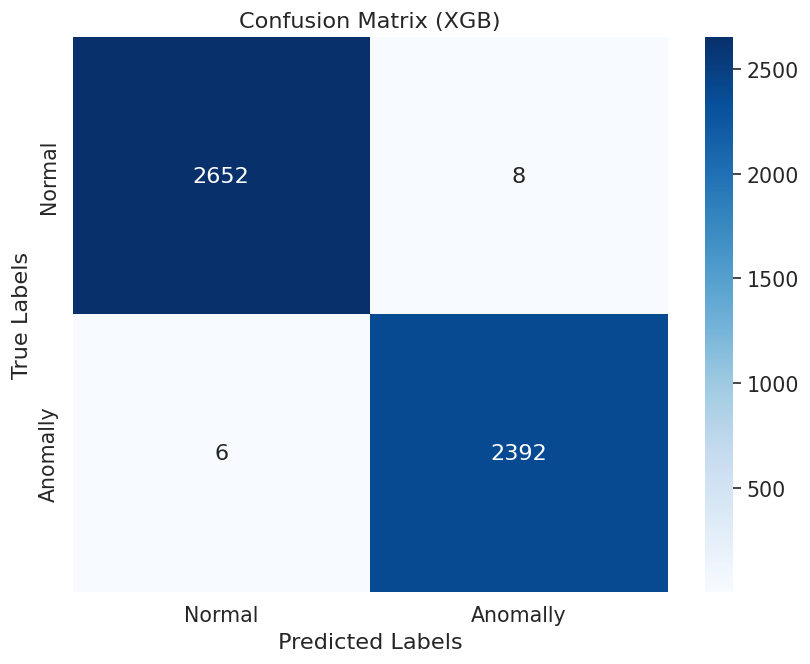

In [36]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

The AUC is 1.000


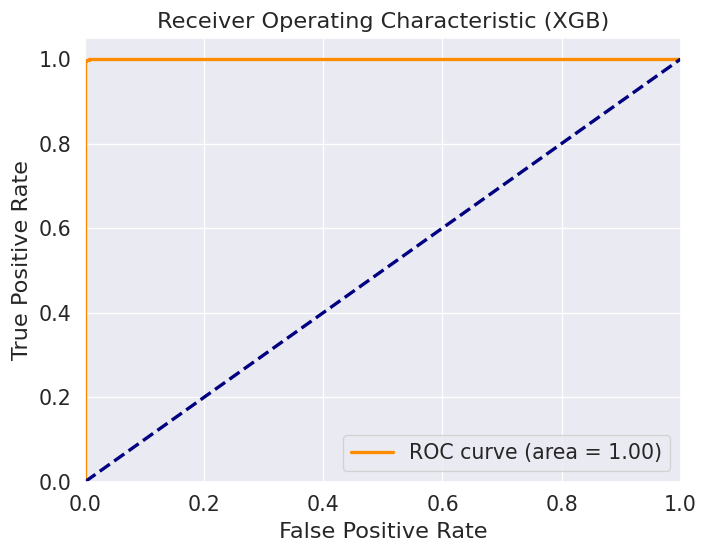

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = xgBoostClassifier.predict_proba(X_test_base)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test_base, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test_base, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (XGB)')
plt.legend(loc="lower right")
plt.show()

# Genetic Algorithm - Feature Selection (Using Models)

Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [38]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [39]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [40]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [41]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [42]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [43]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [44]:
z = X_base.shape[1]
z

38

In [45]:
# logmodel = xgBoostClassifier
# chromo_df_bc, score_bc = generations(X_base,y_base,size=80, n_feat=X_base.shape[1], n_parents=64,
#                                   mutation_rate=0.20,n_gen=5, X_train = X_train_base,
#                                   X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

In [46]:
len(int_data_no_strings.columns)

39

In [48]:
# selected_features = X_base.columns[chromo_df_bc[4]]
# print(selected_features.tolist())

In [49]:
# len(selected_features.tolist())

# Support Vector Machine

In [50]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
subset_data_train = int_data_no_strings[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'count', 'serror_rate', 'rerror_rate', 'same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']]
# subset_data_train = int_data_no_strings
# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)
normalized_df_train['class_label'] = top_10_info_gain['class_label']
normalized_df_train.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,logged_in,num_compromised,root_shell,num_root,num_file_creations,...,num_access_files,count,serror_rate,rerror_rate,same_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,class_label
count,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,...,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,2.519200e+04,25192.000000
mean,1.424357e-17,1.410255e-19,-5.641019e-19,-1.579485e-17,3.878200e-19,4.371790e-17,8.955117e-18,-1.191665e-17,9.589732e-18,6.205121e-18,...,2.185895e-17,8.017298e-17,7.862170e-18,1.523075e-17,-1.452562e-17,1.635895e-17,6.176916e-17,-6.924351e-17,-1.231505e-16,0.466140
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,...,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.498862
min,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.289642e-01,-6.401420e-01,-3.721856e-01,-1.502538e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
25%,-1.135507e-01,-1.009252e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-7.202436e-01,-6.401420e-01,-3.721856e-01,-1.297820e+00,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
50%,-1.135507e-01,-1.007427e-02,-3.930979e-02,-9.122318e-02,-6.300533e-03,-8.076258e-01,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,-6.155966e-01,-6.401420e-01,-3.721856e-01,7.721087e-01,-4.781831e-01,-2.879935e-01,-6.418041e-01,-6.273647e-01,0.000000
75%,-1.135507e-01,-9.976793e-03,-3.334045e-02,-9.122318e-02,-6.300533e-03,1.238197e+00,-2.187261e-02,-3.937653e-02,-2.172416e-02,-2.780802e-02,...,-4.391678e-02,5.180798e-01,1.595477e+00,-3.721856e-01,7.721087e-01,-2.836056e-01,-1.071171e-01,1.603834e+00,1.614454e+00,1.000000
max,1.584102e+01,1.583257e+02,5.795287e+01,1.143768e+01,1.587167e+02,1.238197e+00,8.483823e+01,2.539584e+01,8.475636e+01,7.550206e+01,...,8.115620e+01,3.718535e+00,1.595477e+00,2.765176e+00,7.721087e-01,2.764775e+00,8.755824e+00,1.603834e+00,1.614454e+00,1.000000


In [51]:
from sklearn.model_selection import train_test_split
X = normalized_df_train.drop(["class_label"], axis=1)
y = normalized_df_train["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [53]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [54]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [55]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.9602609727164887


In [56]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.9618069578716207


In [57]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.9590494255972082


In [58]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.96003896823405


In [59]:
X_test.shape

(5058, 20)

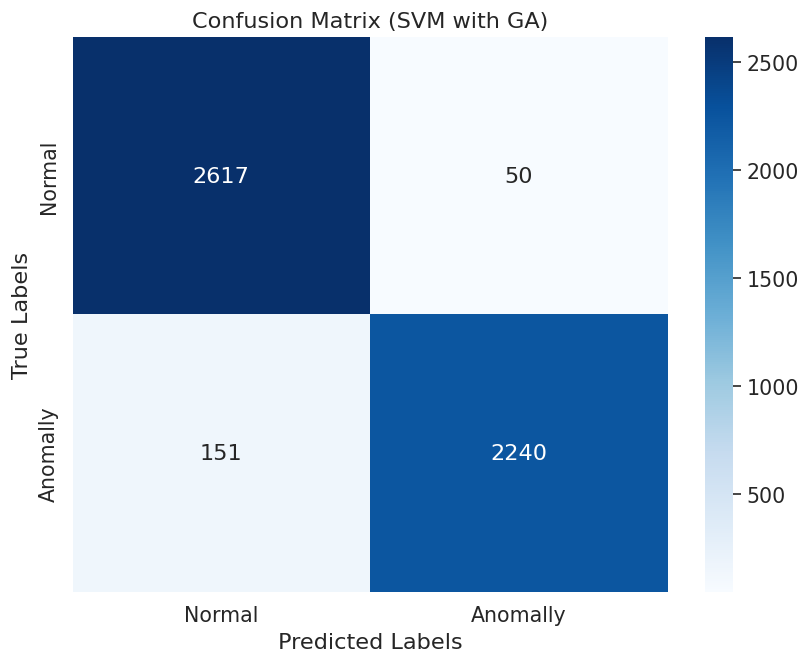

In [60]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM with GA)")
plt.show()

In [61]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2667
           1       0.98      0.94      0.96      2391

    accuracy                           0.96      5058
   macro avg       0.96      0.96      0.96      5058
weighted avg       0.96      0.96      0.96      5058



## ROC Curve

The AUC is 0.987


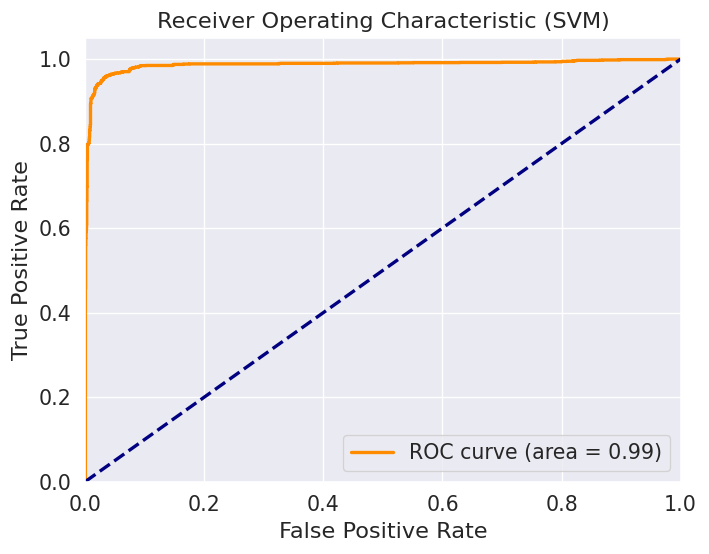

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

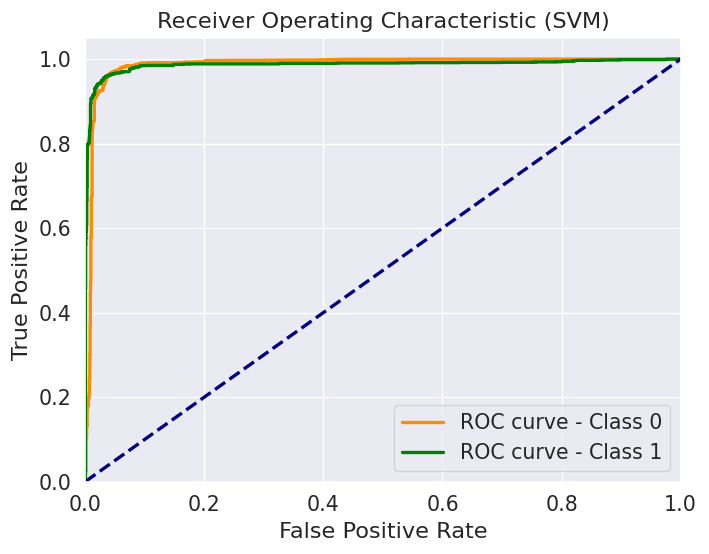

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [64]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [65]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.966


#Naive Bayes

## Splitting Data

In [66]:
top_10_info_gain = int_data_no_strings[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [67]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [68]:
# Normalisation
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

# X_scaler.fit(X_train)

X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

# y_train = y_scaler.fit_transform(y_train.reshape(-1, 1)).flatten()
# y_test = y_scaler.transform(y_test.reshape(-1, 1)).flatten()

In [69]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [70]:
y_train.value_counts()

class_label
0    9399
1    8235
Name: count, dtype: int64

## Train Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train, y_train)

GaussianNB()

In [72]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [73]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

0.8755096493612394


In [74]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

0.880047623561207


In [75]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

0.8715434260274013


In [76]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

0.8737609713002055


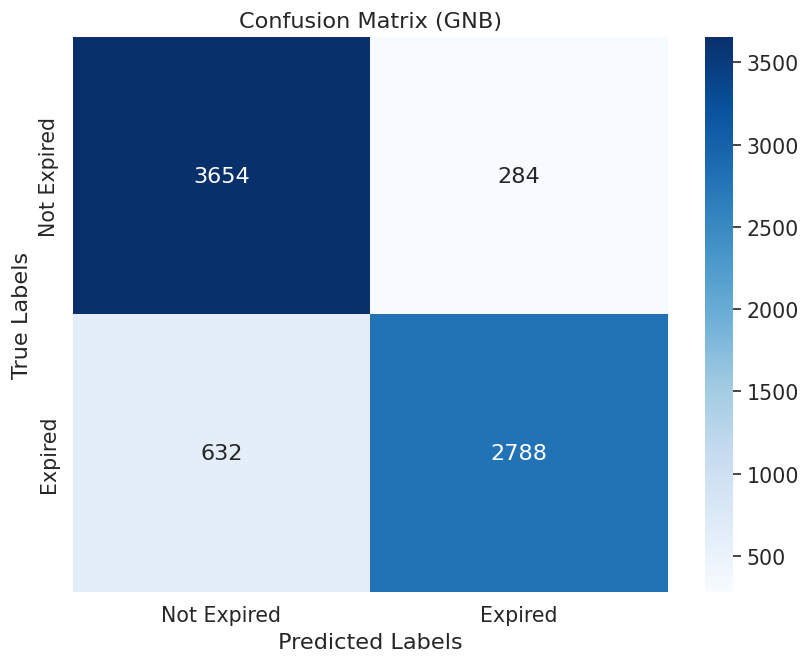

In [77]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [78]:
report = classification_report(y_test, y_pred_GNB)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3938
           1       0.91      0.82      0.86      3420

    accuracy                           0.88      7358
   macro avg       0.88      0.87      0.87      7358
weighted avg       0.88      0.88      0.87      7358



## ROC Curve

The AUC is 0.951
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.635 vs 0.012
1.000	0.636 vs 0.012
1.000	0.637 vs 0.012
1.000	0.637 vs 0.013
1.000	0.637 vs 0.013
1.000	0.637 vs 0.013
1.000	0.637 vs 0.013
1.000	0.637 vs 0.013
1.000	0.637 vs 0.013
1.000	0.637 vs 0.014
1.000	0.638 vs 0.014
1.000	0.638 vs 0.014
1.000	0.638 vs 0.014
1.000	0.639 vs 0.014
1.000	0.639 vs 0.014
1.000	0.640 vs 0.014
1.000	0.640 vs 0.014
1.000	0.641 vs 0.014
1.000	0.641 vs 0.014
1.000	0.642 vs 0.014
1.000	0.642 vs 0.014
1.000	0.642 vs 0.015
1.000	0.642 vs 0.015
1.000	0.642 vs 0.015
1.000	0.643 vs 0.015
1.000	0.643 vs 0.016
1.000	0.644 vs 0.016
1.000	0.644 vs 0.016
1.000	0.644 vs 0.016
1.000	0.644 vs 0.017
1.000	0.644 vs 0.017
1.000	0.644 vs 0.017
1.000	0.644 vs 0.017
1.000	0.644 vs 0.017
1.000	0.645 vs 0.017
1.000	0.645 vs 0.018
1.000	0.645 vs 0.018
1.000	0.645 vs 0.018
1.000	0.646 vs 0.018
1.000	0.646 vs 0.019
1.000	0.646 vs 0.019
1.000	0.646 vs 0.019
1.000	0.646 vs 0.019
1.000	0.646 vs 0.019
1.000	0.646 vs 0.

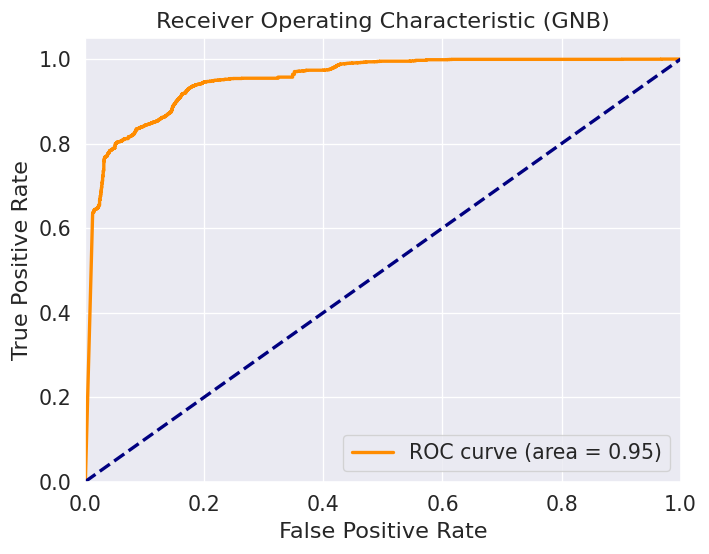

In [79]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

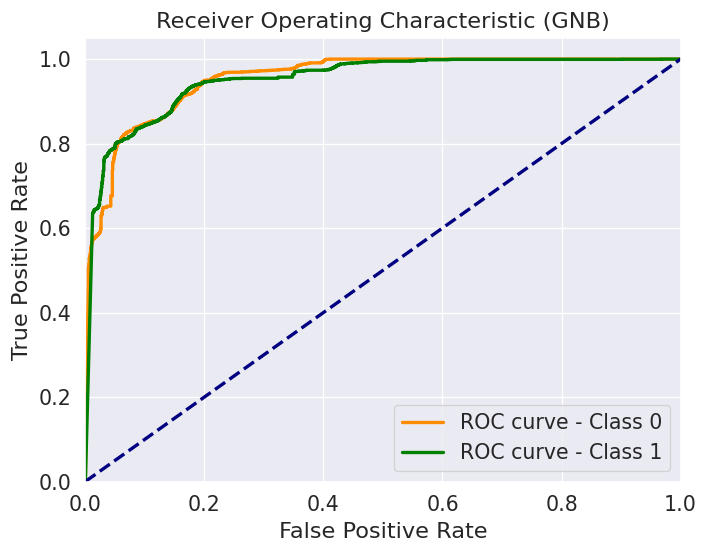

In [80]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [81]:
solution_validate = GNB_classifier.predict(futureSample_X)

In [82]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.875


# Decision Tree

## Splitting Data

In [94]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [95]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [96]:
top_10_info_gain = int_data_no_strings

In [97]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [98]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

In [99]:
futureSample_X

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
8172,0,227,2507,0,0,0,0,0,1,0,...,255,245,0.96,0.01,0.00,0.00,0.00,0.00,0.0,0.0
6685,0,306,1437,0,0,0,0,0,1,0,...,62,255,1.00,0.00,0.02,0.01,0.00,0.00,0.0,0.0
13691,0,212,2971,0,0,0,0,0,1,0,...,26,255,1.00,0.00,0.04,0.05,0.04,0.01,0.0,0.0
17727,0,251,3118,0,0,0,0,0,1,0,...,255,246,0.96,0.01,0.00,0.00,0.00,0.00,0.0,0.0
10992,0,0,0,0,0,0,0,0,0,0,...,150,37,0.24,0.03,0.02,0.05,1.00,0.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,0,28,0,0,3,0,0,0,0,0,...,93,21,0.23,0.04,0.23,0.00,0.00,0.00,0.0,0.0
14055,0,250,293,0,0,0,0,0,1,0,...,200,255,1.00,0.00,0.00,0.02,0.00,0.00,0.0,0.0
14887,0,0,0,0,0,0,0,0,0,0,...,255,6,0.02,0.08,0.00,0.00,1.00,1.00,0.0,0.0
12696,0,44,73,0,0,0,0,0,0,0,...,255,255,1.00,0.00,0.01,0.00,0.00,0.00,0.0,0.0


In [100]:
y_train.value_counts()

class_label
0    9373
1    8261
Name: count, dtype: int64

## Train Decision Tree

In [101]:
# DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
#                                        min_samples_leaf=1, min_samples_split=2)
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100, min_samples_split=300)
DT_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=100, min_samples_leaf=100,
                       min_samples_split=300)

## Measure Decision Tree's performance

In [102]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [103]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

0.9762752075919335


In [104]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

0.9752971008455378


In [105]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

0.9774377774432939


In [106]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

0.9761433737017721


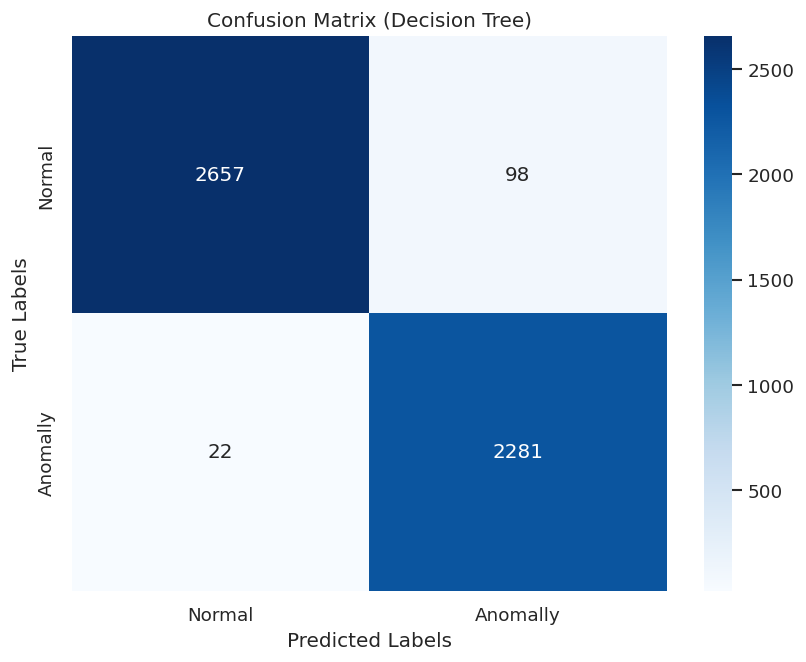

In [107]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [108]:
report = classification_report(y_test, y_pred_DT)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      2755
           1       0.96      0.99      0.97      2303

    accuracy                           0.98      5058
   macro avg       0.98      0.98      0.98      5058
weighted avg       0.98      0.98      0.98      5058



## ROC Curve

The AUC is 0.997
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.822 vs 0.000
0.996	0.854 vs 0.001
0.995	0.881 vs 0.001
0.990	0.894 vs 0.001
0.965	0.915 vs 0.002
0.812	0.926 vs 0.005
0.721	0.941 vs 0.011
0.690	0.952 vs 0.014
0.679	0.975 vs 0.027
0.677	0.982 vs 0.031
0.652	0.990 vs 0.036
0.317	0.992 vs 0.047
0.140	0.994 vs 0.068
0.112	0.996 vs 0.082
0.058	0.998 vs 0.102
0.052	0.998 vs 0.119
0.040	0.999 vs 0.143
0.037	0.999 vs 0.154
0.010	0.999 vs 0.175
0.005	0.999 vs 0.195
0.000	1.000 vs 1.000


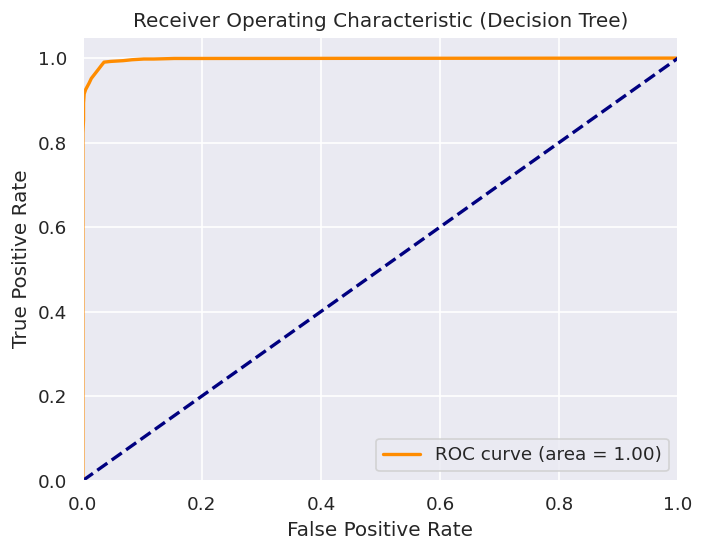

In [109]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

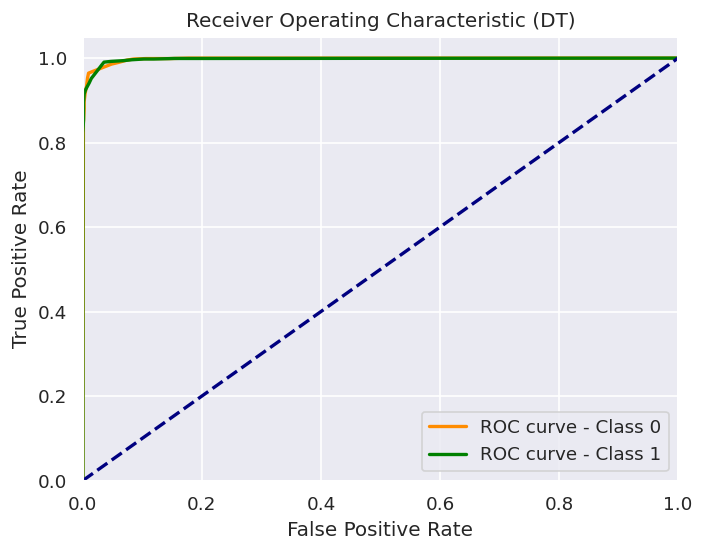

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [111]:
solution_validate = DT_classifier.predict(futureSample_X)

In [112]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9812


# Random Forrest

##Splitting Data

In [113]:
top_10_info_gain = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [114]:
top_10_info_gain = int_data_no_strings

In [115]:
from sklearn.model_selection import train_test_split
X = top_10_info_gain.drop(["class_label"], axis=1)
y = top_10_info_gain["class_label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [116]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-200:]
futureSample_y = y_test[-200:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-200]
y_test = y_test[0:-200]

In [117]:
y_train.value_counts()

class_label
0    9389
1    8245
Name: count, dtype: int64

## Train Random Forrest

In [118]:
from sklearn.ensemble import RandomForestClassifier
RF_classifier = RandomForestClassifier(
    criterion='entropy',
    max_depth=30,  # Reducing max_depth
    min_samples_leaf=50,  # Increasing min_samples_leaf further
    min_samples_split=100,  # Increasing min_samples_split further
    n_estimators=200,  # Reducing the number of estimators further
    max_features=0.2,  # Using a smaller fraction of features for each split
    bootstrap=True,
    oob_score=True,
    random_state=42,
    class_weight='balanced_subsample'  # Handling class imbalance by subsampling
)
RF_classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=30, max_features=0.2, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200, oob_score=True,
                       random_state=42)

## Measure Random Forrest's performance

In [119]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
22240,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.99,0.98,0.00,0.00,0.0,0.98,1.0
7086,0,8,0,0,0,0,0,0,0,0,...,3,171,1.00,0.00,1.00,0.25,0.00,0.0,0.00,0.0
19378,0,290,482,0,0,0,0,0,1,0,...,245,255,1.00,0.00,0.00,0.01,0.00,0.0,0.00,0.0
11035,2,914,283,0,0,0,0,0,1,0,...,140,90,0.56,0.05,0.01,0.02,0.01,0.0,0.01,0.0
6579,0,0,0,0,0,0,0,0,0,0,...,255,10,0.04,0.07,0.00,0.00,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602,0,203,1744,0,0,0,0,0,1,0,...,174,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.0
3562,0,0,0,0,0,0,0,0,0,0,...,255,1,0.00,0.07,0.00,0.00,1.00,1.0,0.00,0.0
3791,0,0,0,0,0,0,0,0,0,0,...,255,25,0.10,0.04,0.00,0.00,1.00,1.0,0.00,0.0
17232,0,229,684,0,0,0,0,0,1,0,...,11,255,1.00,0.00,0.09,0.01,0.00,0.0,0.00,0.0


In [120]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [121]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

0.989127480293558


In [122]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

0.9894589336849948


In [123]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

0.9887129531203487


In [124]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

0.9890618394067527


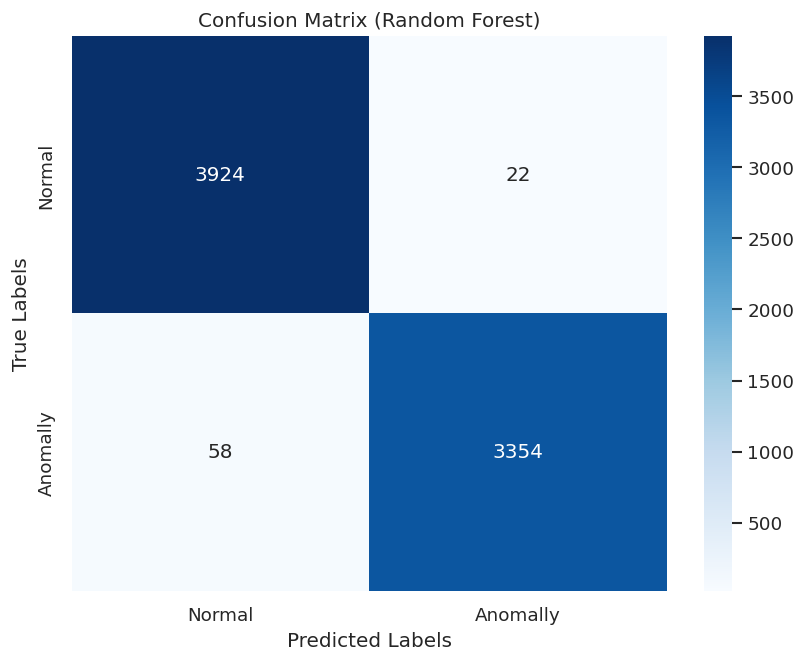

In [125]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [126]:
report = classification_report(y_test, y_pred_RF)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3946
           1       0.99      0.98      0.99      3412

    accuracy                           0.99      7358
   macro avg       0.99      0.99      0.99      7358
weighted avg       0.99      0.99      0.99      7358



## ROC Curve

The AUC is 0.999
Threshold	TPR vs FPR
2.000	0.000 vs 0.000
1.000	0.284 vs 0.000
1.000	0.290 vs 0.000
1.000	0.293 vs 0.000
1.000	0.297 vs 0.000
1.000	0.304 vs 0.000
1.000	0.339 vs 0.000
1.000	0.348 vs 0.000
1.000	0.350 vs 0.000
1.000	0.353 vs 0.000
1.000	0.353 vs 0.000
1.000	0.357 vs 0.000
1.000	0.357 vs 0.000
1.000	0.358 vs 0.000
1.000	0.359 vs 0.000
1.000	0.359 vs 0.000
1.000	0.363 vs 0.000
1.000	0.365 vs 0.000
1.000	0.365 vs 0.000
1.000	0.367 vs 0.000
1.000	0.372 vs 0.000
1.000	0.373 vs 0.000
1.000	0.380 vs 0.000
1.000	0.381 vs 0.000
1.000	0.384 vs 0.000
1.000	0.385 vs 0.000
1.000	0.385 vs 0.000
1.000	0.388 vs 0.000
1.000	0.391 vs 0.000
1.000	0.391 vs 0.000
1.000	0.392 vs 0.000
1.000	0.392 vs 0.000
1.000	0.395 vs 0.000
1.000	0.396 vs 0.000
1.000	0.398 vs 0.000
1.000	0.407 vs 0.000
1.000	0.409 vs 0.000
1.000	0.413 vs 0.000
1.000	0.414 vs 0.000
1.000	0.416 vs 0.000
1.000	0.416 vs 0.000
1.000	0.417 vs 0.000
1.000	0.419 vs 0.000
1.000	0.419 vs 0.000
1.000	0.421 vs 0.000
1.000	0.422 vs 0.

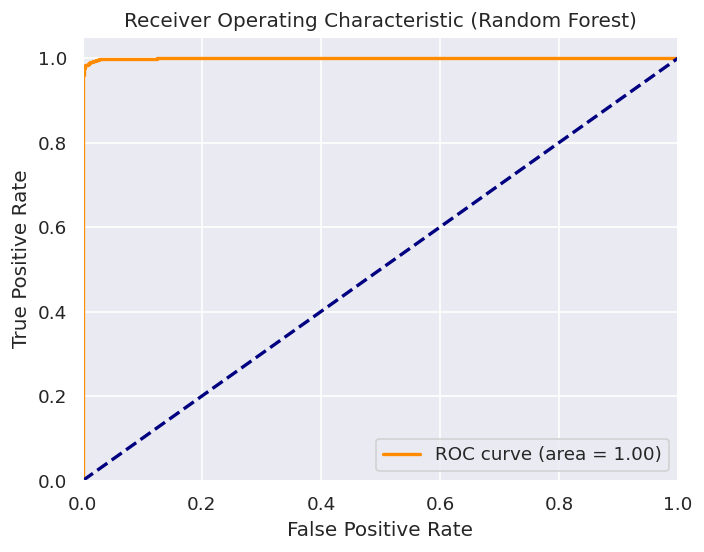

In [127]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

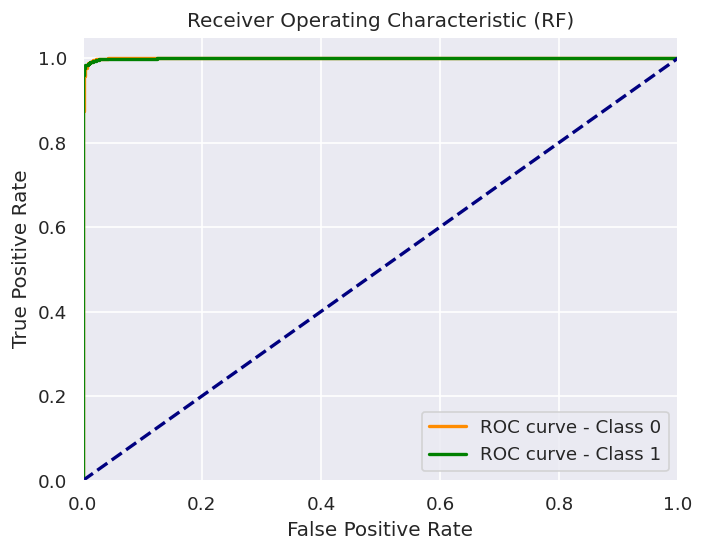

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [129]:
solution_validate = RF_classifier.predict(futureSample_X)

In [130]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.99


# Basic Neural Network

In [131]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 3), max_iter=1000, random_state=101)
nn_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 3), max_iter=1000,
              random_state=101, solver='lbfgs')

## Measure Basic Neural Network performance

In [132]:
# Predict the class labels of samples in the test dataset
y_pred_NN = nn_clf.predict(X_test)

In [133]:
score_test = accuracy_score(y_test, y_pred_NN)
print (score_test)

0.9654670547763958


In [134]:
precision_test = precision_score(y_test, y_pred_NN, average='macro')
print (precision_test)

0.9692170835773828


In [135]:
recall_test = recall_score(y_test, y_pred_NN, average='macro')
print (recall_test)

0.9629402339146454


In [136]:
f1_test =  f1_score(y_test, y_pred_NN, average='macro')
print(f1_test)

0.9650807002468113


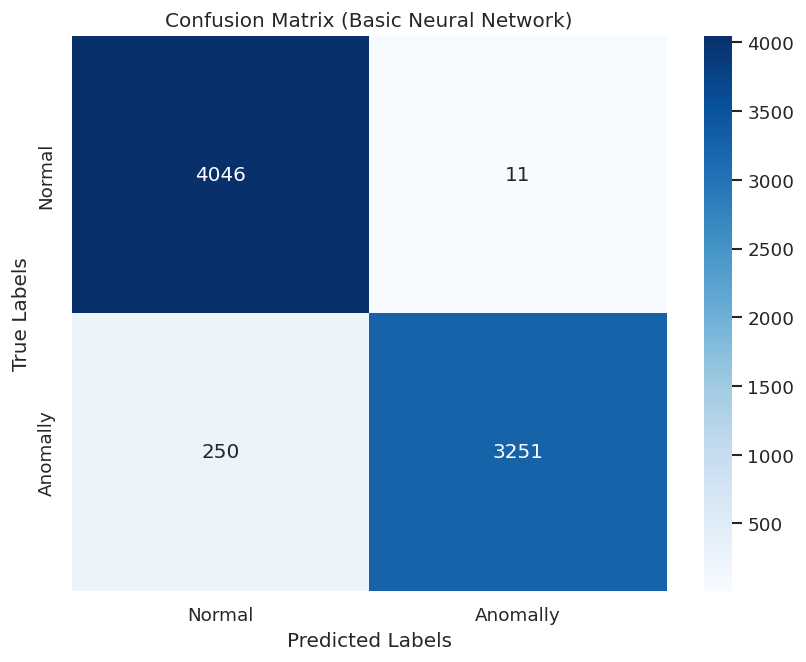

In [137]:
mat = confusion_matrix(y_test, y_pred_NN)
class_names = ["Normal", "Anomally"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Basic Neural Network)")
plt.show()

In [138]:
report = classification_report(y_test, y_pred_NN)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      4057
           1       1.00      0.93      0.96      3501

    accuracy                           0.97      7558
   macro avg       0.97      0.96      0.97      7558
weighted avg       0.97      0.97      0.97      7558



## ROC Curve

The AUC is 0.964


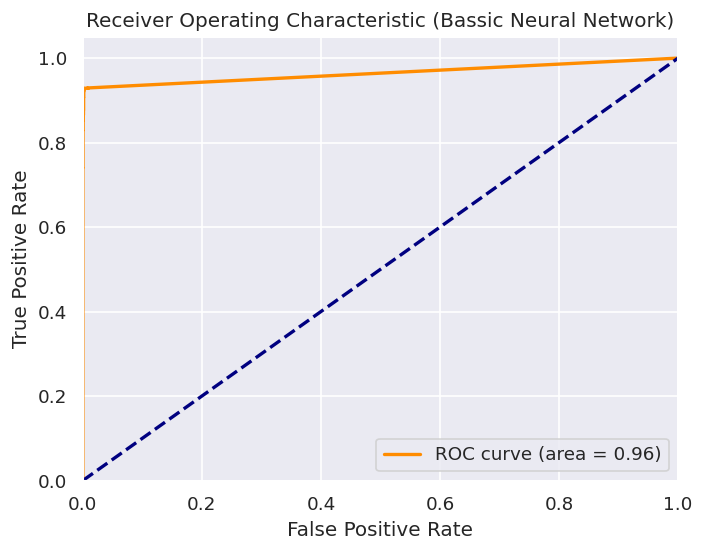

In [139]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = nn_clf.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

# print("Threshold\tTPR vs FPR")
# for f, p, t in zip(fpr, tpr, thresholds):
#     print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Bassic Neural Network)')
plt.legend(loc="lower right")
plt.show()

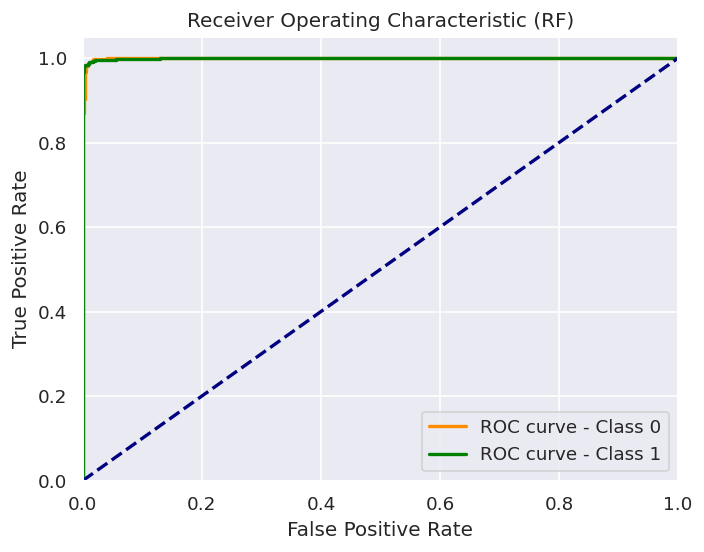

In [140]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()